# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Read in Data and Split in Test and Train

In [2]:
df = pd.read_csv("bank+marketing/bank/bank_preprocessed.csv")
X = df.drop(columns = "y")
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
print ("Number of training examples: " + str(X_train.shape[0]))
print ("Number of testing examples: " + str( X_test.shape[0]))
print ("Number of features = " + str(X_train.shape[1]))

Number of training examples: 3616
Number of testing examples: 905
Number of features = 43


# Define Functions for Single-Neuron

In [4]:
def sigmoid(z):
    z = np.array(z, dtype=np.float64)
    z = np.clip(z, -500, 500)
    s = 1 / (1 + np.exp(-z))
    return s

def initialize_with_zeros(dim):
    """Initialize the weights and bias to zero."""
    w = np.zeros((dim,1))
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b

def initialize_with_random(dim):
    """Initialize the weights with small random values and bias to zero."""
    w = np.random.randn(dim, 1) * np.sqrt(1. / dim)
    b = 0.0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b

def propagate(w, b, X, Y):
    m = X.shape[1]   
    A = sigmoid(np.dot(w.T, X) + b)                         # compute activation
    epsilon = 1e-8
    cost = -1/m * np.sum(Y * np.log(A + epsilon) + (1-Y) * np.log(1 - A + epsilon)) # compute cost

    dw = (1 / m ) * np.dot(X , (A - Y).T)
    db = (1 / m) * np.sum(A - Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """Optimize weights using gradient descent."""
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate * dw
        if i % 500 == 0:
            costs.append(cost)
        if print_cost and i % 500 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

def predict(w, b, X):
    """Make predictions using learned weights and bias."""
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid( np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
        pass
    assert(Y_prediction.shape == (1, m))
    return Y_prediction

In [5]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.1, print_cost = True):
    w, b = initialize_with_random(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

# Shape and Normalize Input Data

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
X_train = X_train.T
X_test = X_test.T
X_train_scaled = X_train_scaled.T
X_test_scaled = X_test_scaled.T

# Apply to data

In [8]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 5000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 13.612479


Cost after iteration 500: 3.156170
Cost after iteration 1000: 2.859597
Cost after iteration 1500: 3.022699
Cost after iteration 2000: 2.744089
Cost after iteration 2500: 2.894954
Cost after iteration 3000: 3.009802
Cost after iteration 3500: 3.026158
Cost after iteration 4000: 6.087475
Cost after iteration 4500: 6.470507
train accuracy: 84.09845132743362 %
test accuracy: 84.97237569060773 %


In [9]:
y_pred = pd.Series(d["Y_prediction_test"].flatten())
roc_value = roc_auc_score(y_test, y_pred)
print("ROC AUC: ", np.round(roc_value, 3))

ROC AUC:  0.557


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       807
           1       0.24      0.18      0.21        98

    accuracy                           0.85       905
   macro avg       0.57      0.56      0.56       905
weighted avg       0.83      0.85      0.84       905



In [11]:
d = model(X_train_scaled, y_train, X_test_scaled, y_test, num_iterations = 20000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.760804
Cost after iteration 500: 0.668989
Cost after iteration 1000: 0.640751
Cost after iteration 1500: 0.629974
Cost after iteration 2000: 0.624994
Cost after iteration 2500: 0.622339
Cost after iteration 3000: 0.620759
Cost after iteration 3500: 0.619732
Cost after iteration 4000: 0.619017
Cost after iteration 4500: 0.618489
Cost after iteration 5000: 0.618084
Cost after iteration 5500: 0.617761
Cost after iteration 6000: 0.617497
Cost after iteration 6500: 0.617276
Cost after iteration 7000: 0.617089
Cost after iteration 7500: 0.616929
Cost after iteration 8000: 0.616790
Cost after iteration 8500: 0.616668
Cost after iteration 9000: 0.616560
Cost after iteration 9500: 0.616464
Cost after iteration 10000: 0.616378
Cost after iteration 10500: 0.616300
Cost after iteration 11000: 0.616230
Cost after iteration 11500: 0.616166
Cost after iteration 12000: 0.616108
Cost after iteration 12500: 0.616055
Cost after iteration 13000: 0.616006
Cost after iteration 1350

In [12]:
y_pred = pd.Series(d["Y_prediction_test"].flatten())
roc_value = roc_auc_score(y_test, y_pred)
print("ROC AUC: ", np.round(roc_value, 3))

ROC AUC:  0.823


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87       807
           1       0.32      0.87      0.47        98

    accuracy                           0.79       905
   macro avg       0.65      0.82      0.67       905
weighted avg       0.91      0.79      0.83       905



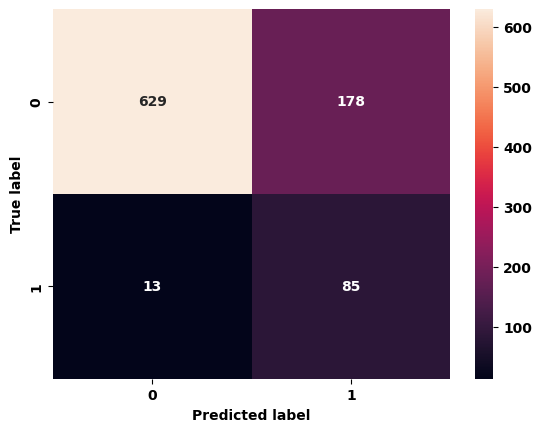

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [15]:
cols = df.drop(columns = ["y"]).columns.to_list()
weights = d["w"].flatten()

Text(0.5, 1.0, 'Feature Importance')

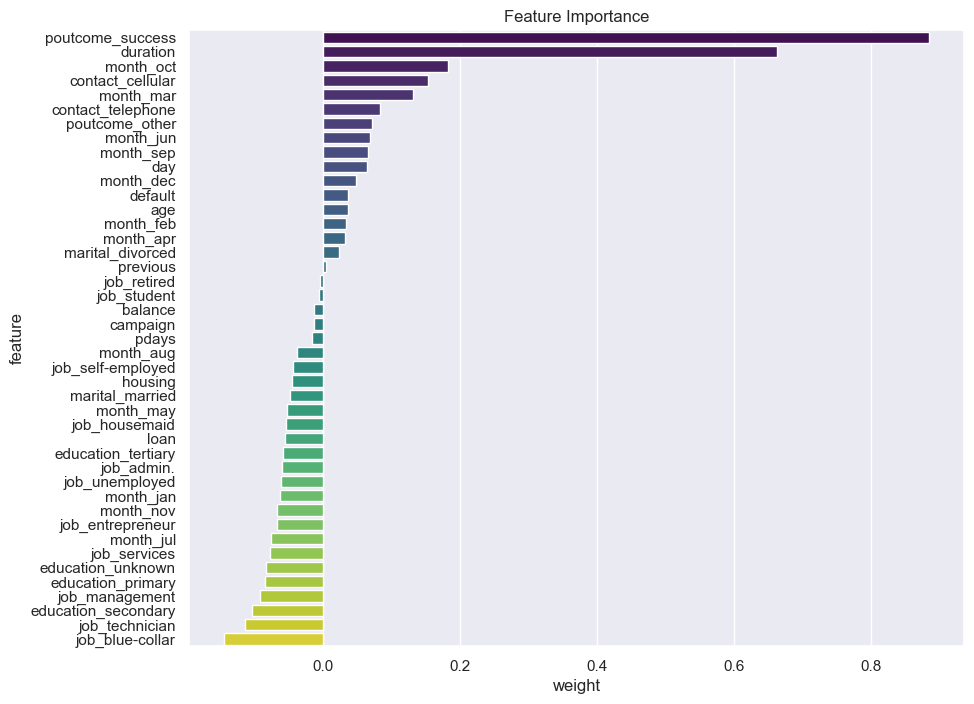

In [16]:
features = pd.DataFrame({"feature": cols, "weight": weights}).sort_values(by = "weight", ascending = False).set_index("feature")
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(data = features, x = "weight", y = features.index, palette = "viridis")
plt.title("Feature Importance")

In [17]:
features

,weight
feature,
poutcome_success,0.883880
duration,0.661831
month_oct,0.181904
contact_cellular,0.153100
month_mar,0.131748
contact_telephone,0.083652
poutcome_other,0.072131
month_jun,0.068294
month_sep,0.066043
